# FP-Growth

### Hecho con ‚ù§ por:
### Acosta Imandt Daniel
### Callejas Hern√°ndez Edgar
### Gardu√±o Mart√≠nez Eduardo

## Introducci√≥n


Es de sumo inter√©s para tiendas de autoservicio poder saber cuales son los productos que se venden m√°s juntos, con ayuda de las reglas de asociaci√≥n, esto se hace con la finalidad de poder poner estos productos en lugares cercanos o crear promociones de estos y aumentar las ventas de los usuarios.

In [1]:
#Cargamos liberer√≠as
!pip install networkx
!pip install pydot==1.4.2
import pandas as pd
from itertools import combinations
from itertools import permutations 
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
from matplotlib.pyplot import figure



     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.0/2.0 MB 82.4 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


### Exploraci√≥n de los datos

In [2]:
depa=pd.read_csv('departments.csv')
print(depa.shape)
depa.head()

(21, 2)


department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

In [3]:
pas=pd.read_csv('aisles.csv')
print(pas.shape)
pas.head()

(134, 2)


aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

In [4]:
product = pd.read_csv('products.csv')
def product_name(idp):
    return product[product['product_id']==idp]['product_name'].values.item()

print(product.shape)
product.head()

(49688, 4)


product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13

In [5]:
data = pd.read_csv('orders_file1.csv')
data = data[['order_id','product_id']]
data = data.groupby(['order_id'])['product_id'].apply(list).reset_index(name='Description')
data.head(5)

order_id                                        Description
0         2  [33120, 28985, 9327, 45918, 30035, 17794, 4014...
1         3  [33754, 24838, 17704, 21903, 17668, 46667, 174...
2         4  [46842, 26434, 39758, 27761, 10054, 21351, 225...
3         5  [13176, 15005, 47329, 27966, 23909, 48370, 132...
4         6                              [40462, 15873, 41897]

# Algoritmo

## Paso 1. Calcular las frecuencias

In [6]:
#Contamos el total de palabras y definimos el soporte minimo
total_trans = data['order_id'].nunique()
minSup = 0.075
minSup2=0.09

In [7]:
data_ = pd.read_csv('orders_file1.csv')
#Contamos el n√∫mero de transacciones que tuvo un producto
data1 = data_.groupby(['product_id'])['order_id'].count().reset_index(name='Description')
data1.head()


product_id  Description
0           1          103
1           2            6
2           3            8
3           4           25
4           8            5

In [8]:
#Pasamos a un diccionario el id del producto y el n√∫mero de transacciones en las que aparece
frec = {}
for j in range(data1.shape[0]):
    frec[data1.iloc[j,0]] = data1.iloc[j,1]

#frec

In [9]:
frec_prods = pd.DataFrame({'id':frec.keys(),'frecuencia':frec.values()})
merged_left = pd.merge(left=product, right=pas, how='left', left_on='aisle_id', right_on='aisle_id')
merged_left = pd.merge(left=merged_left, right=depa, how='left', left_on='department_id', right_on='department_id')
merged_left = pd.merge(left=merged_left, right=frec_prods, how='left', left_on='product_id', right_on='id')
merged_left=merged_left[['id','product_name','aisle','department', 'frecuencia']]
merged_left.head()

id                                       product_name  \
0  1.0                         Chocolate Sandwich Cookies   
1  2.0                                   All-Seasons Salt   
2  3.0               Robust Golden Unsweetened Oolong Tea   
3  4.0  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4  NaN                          Green Chile Anytime Sauce   

                        aisle department  frecuencia  
0               cookies cakes     snacks       103.0  
1           spices seasonings     pantry         6.0  
2                         tea  beverages         8.0  
3                frozen meals     frozen        25.0  
4  marinades meat preparation     pantry         NaN

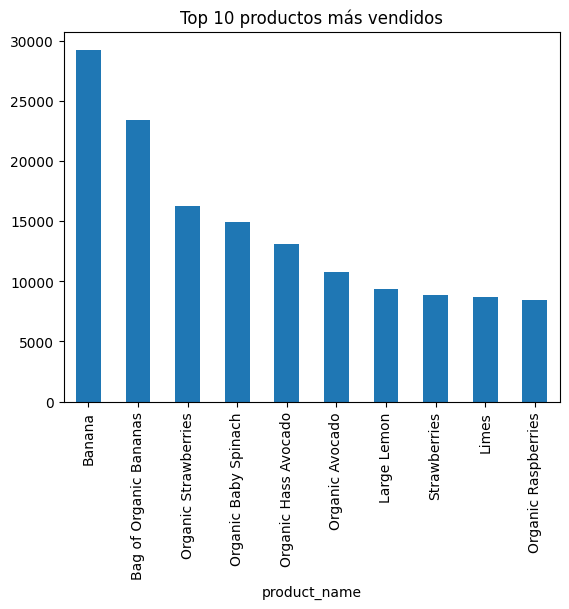

In [10]:
merged_left.groupby('product_name')['frecuencia'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Top 10 productos m√°s vendidos')
plt.show()

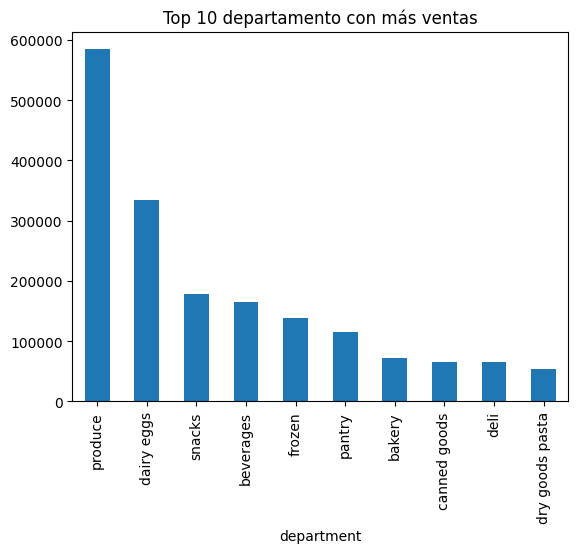

In [11]:
merged_left.groupby('department')['frecuencia'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Top 10 departamento con m√°s ventas')
plt.show()

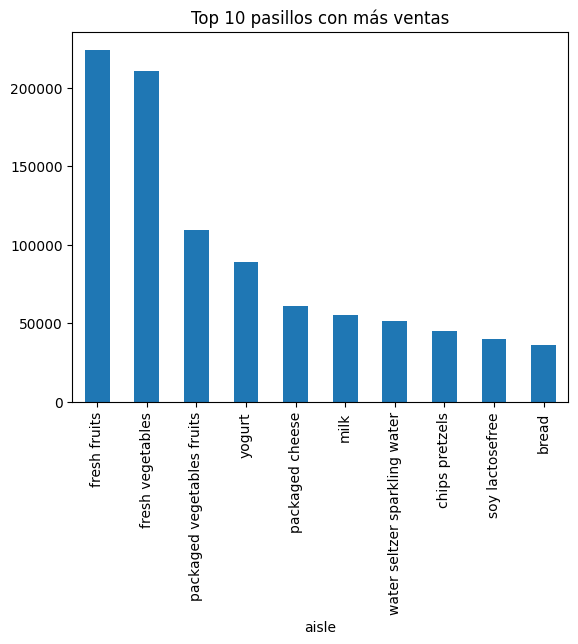

In [12]:
merged_left.groupby('aisle')['frecuencia'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Top 10 pasillos con m√°s ventas')
plt.show()

In [13]:
#Ordenamos por el n√πmero de apariciones
frec1=sorted(frec.items(), key=lambda x:x[1],reverse=True)
frec1[0]

(24852, 29255)

## Paso 2.  Re-escribir los TIDS

In [14]:
#Ordenamos  los productos por transacciones
data['Description'] = data['Description'].apply(lambda x: sorted(x,key = lambda i:frec[i], reverse=True))

In [15]:
# Filtramos nuestros datos por el sporte minimo
desc_filtrada = []
desc_filtrada2 = []
for t in data.itertuples():
    #print(t[2])
    desc_filtrada.append(list(filter(lambda item: (frec[item]/total_trans >= minSup), t[2])))
    desc_filtrada2.append(list(filter(lambda item: (frec[item]/total_trans >= minSup2), t[2])))
    
desc_filtrada = [x for x in desc_filtrada if x != []]
desc_filtrada2 = [x for x in desc_filtrada2 if x != []]

desc_filtrada_nombres = []
for t in desc_filtrada:
    desc_filtrada_nombres.append(list(map(product_name,t)))

desc_filtrada_nombres2 = []
for t in desc_filtrada2:
    desc_filtrada_nombres2.append(list(map(product_name,t)))

desc_filtrada_nombres

KeyboardInterrupt: 

In [ ]:
desc_filtrada2 = []
for t in data.itertuples():
    #print(t[2])
    
    desc_filtrada2.append(list(filter(lambda item: (frec[item]/total_trans >= minSup2), t[2])))
    

desc_filtrada2 = [x for x in desc_filtrada2 if x != []]


desc_filtrada_nombres2 = []
for t in desc_filtrada2:
    desc_filtrada_nombres2.append(list(map(product_name,t)))

desc_filtrada_nombres2

In [16]:

rutas = {}
rutas_ = {}
for j in desc_filtrada_nombres:
    for v in j:
        rutas[v] = []
        rutas_[v] = []

for j in desc_filtrada_nombres:
    for i in range(len(j)-1,0,-1):
        if j[:i] in rutas[j[i]]:
            indice = rutas[j[i]].index(j[:i])
            rutas_[j[i]][indice] += 1
        else:
            rutas[j[i]].append(j[:i])
            rutas_[j[i]].append(1)
rutas_

{'Organic Baby Spinach': [2595, 1111, 617, 2435, 629, 7],
 'Bag of Organic Bananas': [72],
 'Banana': [],
 'Organic Strawberries': [3507, 3789, 10]}

In [ ]:
rutas2 = {}
rutas_2 = {}
for j in desc_filtrada_nombres2:
    for v in j:
        rutas2[v] = []
        rutas_2[v] = []

for j in desc_filtrada_nombres2:
    for i in range(len(j)-1,0,-1):
        if j[:i] in rutas2[j[i]]:
            indice2 = rutas2[j[i]].index(j[:i])
            rutas_2[j[i]][indice2] += 1
        else:
            rutas2[j[i]].append(j[:i])
            rutas_2[j[i]].append(1)
rutas_2

In [17]:
rutas

{'Organic Baby Spinach': [['Banana'],
  ['Organic Strawberries'],
  ['Banana', 'Organic Strawberries'],
  ['Bag of Organic Bananas'],
  ['Bag of Organic Bananas', 'Organic Strawberries'],
  ['Banana', 'Bag of Organic Bananas']],
 'Bag of Organic Bananas': [['Banana']],
 'Banana': [],
 'Organic Strawberries': [['Banana'],
  ['Bag of Organic Bananas'],
  ['Banana', 'Bag of Organic Bananas']]}

In [18]:
def devolver_pref(a,b):
    prefijos = []
    for j in range(len(a)-1,-1,-1):
        if a[:j+1] == b[:len(a[:j+1])]:
            prefijos.append(a[:j+1])
            break
    if len(prefijos) == 0:
        return False
    else:
        return prefijos

##  Paso 3. Construimos el FP-TREE

In [19]:
def get_correct_name(nodo):
    nodo = nodo.replace('[','')
    nodo = nodo.replace(']','')
    nodo = nodo.split(',')
    return nodo[-1]

def format_name(te):
    te = te.replace("'",'')
    te = te.replace(' ', '\n')
    return te

def es_prefijo(ruta,p):
    return p == ruta[:len(p)]
#Creamos el arbol
g = nx.DiGraph()
for j in desc_filtrada_nombres:
    for k in range(len(j)):
        if k == 0:
            if g.has_edge('Null',str(j[:k+1])):
                g['Null'][str(j[:k+1])]['count'] += 1
            else:
                g.add_edge('Null',str(j[:k+1]),count=1)
        else:
            if g.has_edge(str(j[:k]),str(j[:k+1])):
                g[str(j[:k])][str(j[:k+1])]['count'] += 1
            else:
                g.add_edge(str(j[:k]),str(j[:k+1]),count=1)

correct_names = dict()
for n in g.nodes:
    correct_names[n] = format_name(get_correct_name(n))


#Creamos el arbol2
g2 = nx.DiGraph()
for j in desc_filtrada_nombres2:
    for k in range(len(j)):
        if k == 0:
            if g2.has_edge('Null',str(j[:k+1])):
                g2['Null'][str(j[:k+1])]['count'] += 1
            else:
                g2.add_edge('Null',str(j[:k+1]),count=1)
        else:
            if g2.has_edge(str(j[:k]),str(j[:k+1])):
                g2[str(j[:k])][str(j[:k+1])]['count'] += 1
            else:
                g2.add_edge(str(j[:k]),str(j[:k+1]),count=1)

correct_names2 = dict()
for n in g2.nodes:
    correct_names2[n] = format_name(get_correct_name(n))

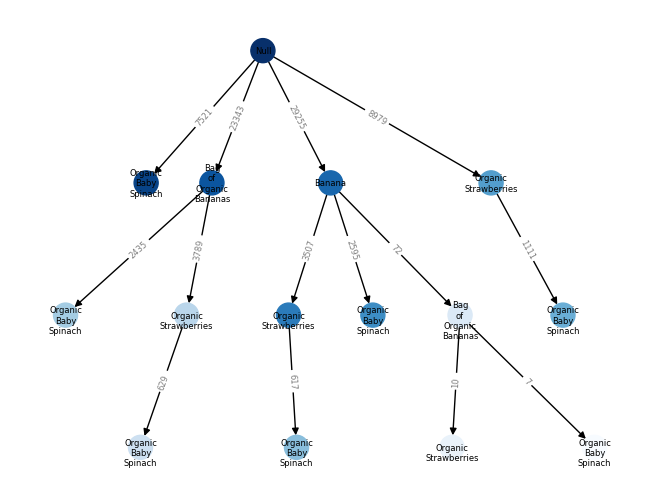

In [20]:

#figure(figsize=(15, 10), dpi=80)
pos = nx.spring_layout(g)
pos1 = graphviz_layout(g, prog="dot")
labels = nx.get_edge_attributes(g,'count')
nx.draw(g,with_labels=True,pos=pos1,font_size=6, labels=correct_names,cmap=plt.cm.Blues,node_color=range(len(g),0,-1))
nx.draw_networkx_edge_labels(g,pos=pos1,alpha=0.5,edge_labels=labels,
                            font_family="sans-serif", font_size=6)
plt.show()

In [ ]:
#figure(figsize=(15, 10), dpi=80)
pos = nx.spring_layout(g2)
pos1 = graphviz_layout(g2, prog="dot")
labels = nx.get_edge_attributes(g2,'count')
nx.draw(g2,with_labels=True,pos=pos1,font_size=6, labels=correct_names,cmap=plt.cm.Blues,node_color=range(len(g),0,-1))
nx.draw_networkx_edge_labels(g2,pos=pos1,alpha=0.5,edge_labels=labels,
                            font_family="sans-serif", font_size=6)
plt.show()

## Paso 4. Patrones base

In [23]:

pat_cond = dict()

for pb in rutas.keys():
    prefijos = []
    for r in rutas[pb]:
        for vr in range(len(r),0,-1):
            if r[:vr] in prefijos:
                pass
            else:
                prefijos.append(r[:vr])

    pre_dict = dict()

    #inicializamos los valores
    for p in prefijos:
        pre_dict[tuple(p)] = 0

    for p in prefijos:
            for ruta in rutas[pb]:
                if es_prefijo(ruta,p):
                    indice = rutas[pb].index(ruta)
                    pre_dict[tuple(p)] += rutas_[pb][indice]

    pat_cond[pb] = pre_dict

pat_cond

{'Organic Baby Spinach': {('Banana',): 3219,
  ('Organic Strawberries',): 1111,
  ('Banana', 'Organic Strawberries'): 617,
  ('Bag of Organic Bananas',): 3064,
  ('Bag of Organic Bananas', 'Organic Strawberries'): 629,
  ('Banana', 'Bag of Organic Bananas'): 7},
 'Bag of Organic Bananas': {('Banana',): 72},
 'Banana': {},
 'Organic Strawberries': {('Banana',): 3517,
  ('Bag of Organic Bananas',): 3789,
  ('Banana', 'Bag of Organic Bananas'): 10}}

In [ ]:
pat_cond2 = dict()

for pb in rutas2.keys():
    prefijos2 = []
    for r in rutas2[pb]:
        for vr in range(len(r),0,-1):
            if r[:vr] in prefijos2:
                pass
            else:
                prefijos2.append(r[:vr])

    pre_dict2 = dict()

    #inicializamos los valores
    for p in prefijos2:
        pre_dict2[tuple(p)] = 0

    for p in prefijos2:
            for ruta in rutas2[pb]:
                if es_prefijo(ruta2,p):
                    indice2 = rutas2[pb].index(ruta)
                    pre_dict2[tuple(p)] += rutas_2[pb][indice2]

    pat_cond2[pb] = pre_dict2

pat_cond2

In [24]:
patron_grande = {}
for j in pat_cond.keys():
    patron_grande[j] = [None,0]

for j in pat_cond.keys():
    for k in pat_cond[j].keys():

        if patron_grande[j][0] == None:
            patron_grande[j][0] = k[0]
            patron_grande[j][1] = pat_cond[j][k]
        
        elif patron_grande[j][0] != None and patron_grande[j][1] < pat_cond[j][k]:
            patron_grande[j][0] = k[0]
            patron_grande[j][1] = pat_cond[j][k]

patron_grande

{'Organic Baby Spinach': ['Banana', 3219],
 'Bag of Organic Bananas': ['Banana', 72],
 'Banana': [None, 0],
 'Organic Strawberries': ['Bag of Organic Bananas', 3789]}

##  Paso 5. Patrones Condicionales

In [25]:
rutas

{'Organic Baby Spinach': [['Banana'],
  ['Organic Strawberries'],
  ['Banana', 'Organic Strawberries'],
  ['Bag of Organic Bananas'],
  ['Bag of Organic Bananas', 'Organic Strawberries'],
  ['Banana', 'Bag of Organic Bananas']],
 'Bag of Organic Bananas': [['Banana']],
 'Banana': [],
 'Organic Strawberries': [['Banana'],
  ['Bag of Organic Bananas'],
  ['Banana', 'Bag of Organic Bananas']]}

In [26]:
rutas_

{'Organic Baby Spinach': [2595, 1111, 617, 2435, 629, 7],
 'Bag of Organic Bananas': [72],
 'Banana': [],
 'Organic Strawberries': [3507, 3789, 10]}

In [27]:
patrones_cond = {}
for key,values in rutas.items():
    patrones_cond[key] = []

for key,values in rutas.items():
    if len(values) == 1:
        patrones_cond[key] = values

    else:
        for j in range(1,len(values)):
            if devolver_pref(values[0],values[j]) == False:
                patrones_cond[key] = []
                break
            else:
                patrones_cond[key].append(devolver_pref(values[0],values[j]))

for key,values in patrones_cond.items():
    x_ = []
    for j in values:
        if len(x_) == 0 and len(j) != 0:
            x_ = j
        elif len(j) < len(x_):
            x_ = j
    if len(x_) == 0 or len(x_) == 1:
        patrones_cond[key] = x_
    else:
        patrones_cond[key] = x_[0]

patrones_cond

{'Organic Baby Spinach': [],
 'Bag of Organic Bananas': ['Banana'],
 'Banana': [],
 'Organic Strawberries': []}

# Paso 6. M√©tricas y Reglas de asociaci√≥n

### Soporte

Esta medida nos dice que tan frecuente es el item o items s entre todas las transacciones.

Esta medida es muy buena para ayudarnos a jenerar m√°s √°nalisis ya que podemos estar interesados solo en items que aparezcan cierto total de veces.

$$sup(x)=\frac{\#\text{transacciones con }x}{\# \text{transacciones totales}}$$

In [33]:
tottrans=data.shape[0]
def sup(x):
    for j in x:
        cont=0
        for l in desc_filtrada_nombres:
            esta_list = [True if e in l else False for e in x ]
            if all(esta_list): cont+=1


    return(cont/tottrans)

### Confianza

 La probabilidad de que ocurra el consecuente($y$) dado el antecedente($x$)

$$confianza(x,y)=\frac{sup(x \cup y)}{sup(x)}$$

In [35]:
def conf(x,xy):
    supxy=sup(xy)
    supx=sup(x)
    return(supxy/supx)

### Lift


$lift < 1 \implies$ Que dado el antecedente no  aumentan las chances de que ocurra el consecuente
$lift \geq 1 \implies$ Que dado el antecedente  aumentan las chances de que ocurra el consecuente

$$lift= \frac{soporte(union(X,Y))}{soporte(X)*soporte(Y)}$$

In [37]:
def lift(x,y,xy):
    supxy=sup(xy)
    supx=sup(x)
    supy=sup(x)
    return(supxy/supx*supy)

### Todas juntas :)

In [84]:
perm = permutations(rutas.keys(), 2) 
metricas=pd.DataFrame(perm)
metricas.set_axis(['X', 'Y'], axis='columns', inplace=True)
metricas['Soporte de X'] = metricas.apply(lambda x: sup(x[['X']]), axis=1)
metricas['Confianza'] = metricas.apply(lambda x: conf(x[['X']], x[['X','Y']]), axis=1)
metricas['lift'] = metricas.apply(lambda x: lift(x[['X']],x[['Y']], x[['X','Y']]), axis=1)

metricas

X                       Y  Confianza      lift  \
0     Organic Baby Spinach  Bag of Organic Bananas   0.205900  0.015503   
1     Organic Baby Spinach                  Banana   0.215823  0.016251   
2     Organic Baby Spinach    Organic Strawberries   0.158029  0.011899   
3   Bag of Organic Bananas    Organic Baby Spinach   0.131155  0.015503   
4   Bag of Organic Bananas                  Banana   0.003075  0.000363   
5   Bag of Organic Bananas    Organic Strawberries   0.162246  0.019179   
6                   Banana    Organic Baby Spinach   0.110032  0.016251   
7                   Banana  Bag of Organic Bananas   0.002461  0.000363   
8                   Banana    Organic Strawberries   0.120219  0.017755   
9     Organic Strawberries    Organic Baby Spinach   0.144734  0.011899   
10    Organic Strawberries  Bag of Organic Bananas   0.233282  0.019179   
11    Organic Strawberries                  Banana   0.215966  0.017755   

    Soporte de X  
0       0.075296  
1       0.075296  
2       0.075296  
3       0.118206  
4       0.118206  
5       0.118206  
6       0.147688  
7       0.147688  
8       0.147688  
9       0.082212  
10      0.082212  
11      0.082212

## Conclusiones

Como ya se ha hablado los modelos de mercado canasata son de gran importancia para los mercados y centros departmanetales ya que permiten la miner√≠a de elementos frecuentes y as√≠ poder encontrar tendencias o patrones entre estos datos para poder tomar mejores decisiones futuras.
Pero ahora hay un problema ya que es una cantidad de datos increiblemente grande tomar todas las transacciones y todos los prodictos comparandolos entre si,por lo que hay una increible necesidad de encontrar formas de analizaar estos patrones de la forma m√°s eficientemente posible, por lo que se suele utilizar los √°rboles de enumeraci√≥n para estas tareas en espec√≠fico se utlizo el algoritmo de FP-Growth, el cual se deriva del Apriori, este se utilizo ya que optimiza el espacio en memoria y es m√°s rapido que otros.

Despues de hacer todo el analisis notamos que hay elementos bastante frecuentes como las bananas ( A las personas les suelen gustar las üçå) y aunque parece que si hay una tendencia de dado $x$ la gente compra $y$, no se puede asegurar nada, ya que los valores del $lift$ son menores a 1

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=80ec0f28-1f0b-407e-ab64-4296834938a0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>